# Session 4: Assignment explanation and answers

View datasets and create visualization.

In [1]:
# Import modules
from pyincore import FragilityService, IncoreClient, FragilityCurveSet, MappingSet, Dataset

from pyincore_viz.plotutil import PlotUtil as plot
from pyincore_viz.geoutil import GeoUtil as geoviz

In [2]:
# Connect to IN-CORE serivce by creating IncoreClient
client = IncoreClient()

Connection successful to IN-CORE services. pyIncore version detected: 0.9.3


In [3]:
# Exercise 1: 
# TODO: create a local dataset for building inventory with shapefiles ("sample_bldgs_w_guid.shp") 
#       and dataset inventory IN-CORE type: "ergo:buildingInventoryVer7"
# TODO: acquire GeoDataFrame object from the dataset


# Answer: 
# There is a shape file in your local directory. Sample building inventory has 4 files defining 
# the projection, attributes and other parts of a shape file (cpg, dbf, prj, shp, shx)

# use class method Dataset.from_file with path, filename and corresponding data type.
# Dataset.from_file(path, data_type)
bldgs = Dataset.from_file("sample_bldgs_w_guid.shp", data_type="ergo:buildingInventoryVer7")

# Object bldgs is now in pyincore object type. BTW pyIncore uses Fiona package to open shapefiles. 
print(type(bldgs))

# Construct GeoPanda's GeoDataFrame from a pyincore type.
# getting geodataframe of building dataset 
bldgs_gdf = bldgs.get_dataframe_from_shapefile()
print(type(bldgs_gdf))

# show first five rows only
bldgs_gdf.head()

<class 'pyincore.dataset.Dataset'>
<class 'geopandas.geodataframe.GeoDataFrame'>


,parid,struct_typ,year_built,no_stories,a_stories,b_stories,bsmt_type,sq_foot,gsq_foot,occ_type,...,archetype,appr_land,appr_tot,ffe_elev,g_elev,lhsm_elev,lon,lat,guid,geometry
0,018060 00010,C1,1978,1,1,0,NONE,6062,6062,COM6,...,12,None,None,None,None,None,-90.02585,35.14020,ac8b0b44-ae82-4c48-afb8-076e2d16c7e5,POINT (-90.02585 35.14020)
1,018060 00010,C1,1925,4,3,1,COMMERCIAL BSMT,19468,4867,COM6,...,12,None,None,None,None,None,-90.02585,35.14020,154b0a62-cae6-456d-8d90-635e3e1c2dcb,POINT (-90.02585 35.14020)
2,016001 00001C,S1,1924,14,13,1,COMMERCIAL BSMT,910583,65042,COM6,...,12,None,None,None,None,None,-90.01928,35.13640,9f9b11f8-c25c-4760-b1d2-a63bbeec8e72,POINT (-90.01928 35.13640)
3,012008 00012,URM,1910,5,3,2,COMMERCIAL BSMT,65112,13022,COM6,...,12,None,None,None,None,None,-90.07377,35.12344,28321416-e473-473b-ad0a-c3c38248acc7,POINT (-90.07377 35.12344)
4,001041 00001C,S1,1991,2,2,0,NONE,32094,16047,COM6,...,12,None,None,None,None,None,-90.04349,35.15360,b5069250-7a2b-47b1-9754-290528a6d72d,POINT (-90.04349 35.15360)


In [4]:
# Exercise 2: 
# TODO: create a local dataset for building damage output with CSV ("memphis_eq_bldg_dmg_result.csv") - 
#       it should be in your browser if you ran session 4 notebook (dataset inventory IN-CORE type: "ergo:buildingDamageVer5")
# TODO: acquire DataFrame object from the dataset

# Answer: 
# A CSV file with guid, limit states and damage states is one of two resulting files of Infrastructure Damage Analyses 
# (building, pipeline etc.). The second, json file contains fragility ids, hazard values and other metadata 
# Locate CSV file in Jupyter browser directory

# Retrieve result dataset. If there is no csv file you need to run Building Damage Analyses from session 4 notebook.
bldgs = Dataset.from_file("memphis_eq_bldg_dmg_result.csv", data_type="ergo:buildingDamageVer5")

# Convert dataset to Pandas DataFrame
bldgs_df = bldgs.get_dataframe_from_csv()

print(type(bldgs_df))

# show first five rows only
bldgs_df.head()

<class 'pandas.core.frame.DataFrame'>


,guid,LS_0,LS_1,LS_2,DS_0,DS_1,DS_2,DS_3
0,ac8b0b44-ae82-4c48-afb8-076e2d16c7e5,0.848149,0.327322,2.722964e-02,0.151851,0.520827,0.300092,2.722964e-02
1,154b0a62-cae6-456d-8d90-635e3e1c2dcb,0.844343,0.328299,2.860543e-02,0.155657,0.516043,0.299694,2.860543e-02
2,9f9b11f8-c25c-4760-b1d2-a63bbeec8e72,0.896774,0.480925,8.756720e-02,0.103226,0.415849,0.393358,8.756720e-02
3,28321416-e473-473b-ad0a-c3c38248acc7,0.828098,0.293753,2.738378e-02,0.171902,0.534345,0.266369,2.738378e-02
4,b5069250-7a2b-47b1-9754-290528a6d72d,0.970343,0.154677,1.000000e-10,0.029657,0.815666,0.154677,1.000000e-10


In [5]:
# Exercise 3: 
# TODO: Join/merge building inventory GeoDataframe and damage output Dataframe using results of Excercise 1 and 2.

# Answer: 
# We now have two objects, Geopanda's GeoDataFrame with buildings attributes and coordinates 
# and Panda's DataFrame with  Damage states. Both objects have GUID referencing buildings.

# Merge/join two dataframe using GUID. We can also specify first three columns, guid, struct_typ and geometry, 
# and their order.
bldgs_joined_gdf = bldgs_gdf[['guid', 'struct_typ', 'geometry', 'appr_bldg']].merge(bldgs_df, on='guid')
bldgs_joined_gdf.head()

,guid,struct_typ,geometry,appr_bldg,LS_0,LS_1,LS_2,DS_0,DS_1,DS_2,DS_3
0,ac8b0b44-ae82-4c48-afb8-076e2d16c7e5,C1,POINT (-90.02585 35.14020),163315,0.848149,0.327322,2.722964e-02,0.151851,0.520827,0.300092,2.722964e-02
1,154b0a62-cae6-456d-8d90-635e3e1c2dcb,C1,POINT (-90.02585 35.14020),524485,0.844343,0.328299,2.860543e-02,0.155657,0.516043,0.299694,2.860543e-02
2,9f9b11f8-c25c-4760-b1d2-a63bbeec8e72,S1,POINT (-90.01928 35.13640),49457042,0.896774,0.480925,8.756720e-02,0.103226,0.415849,0.393358,8.756720e-02
3,28321416-e473-473b-ad0a-c3c38248acc7,URM,POINT (-90.07377 35.12344),367311,0.828098,0.293753,2.738378e-02,0.171902,0.534345,0.266369,2.738378e-02
4,b5069250-7a2b-47b1-9754-290528a6d72d,S1,POINT (-90.04349 35.15360),1027399,0.970343,0.154677,1.000000e-10,0.029657,0.815666,0.154677,1.000000e-10


In [6]:
# Exercise 4: 
# TODO: Using joined GeoDataFrame, display the table grouped by "struct_type" and show a sum of apprasial 
#       value of buildings "appr_bldg" 

# Answer: 
# We have a joined object, GeoDataFrame bldgs_joined_gdf with all attributes (columns). We can show only guid
# and struct_type and appr_bldg columns. Dont forget to keep geometry column or new dataframe 
# will not be georeferenced

bldgs_new = bldgs_joined_gdf[['guid', 'geometry', 'struct_typ', 'appr_bldg']]
bldgs_new.head()

,guid,geometry,struct_typ,appr_bldg
0,ac8b0b44-ae82-4c48-afb8-076e2d16c7e5,POINT (-90.02585 35.14020),C1,163315
1,154b0a62-cae6-456d-8d90-635e3e1c2dcb,POINT (-90.02585 35.14020),C1,524485
2,9f9b11f8-c25c-4760-b1d2-a63bbeec8e72,POINT (-90.01928 35.13640),S1,49457042
3,28321416-e473-473b-ad0a-c3c38248acc7,POINT (-90.07377 35.12344),URM,367311
4,b5069250-7a2b-47b1-9754-290528a6d72d,POINT (-90.04349 35.15360),S1,1027399


In [7]:
# Exercise 4 cont.:

# Run stastics on a column.
# Sum of all rows = 270,160,346
total = bldgs_new["appr_bldg"].sum()
print(total)

270160346


In [8]:
# Exercise 4 cont.:

# Run stastics on a column (first five rows).
# Sum of 5 rows = 51,539,552 with mean value of 10,307,910
bldgs_new["appr_bldg"].head().describe()

count    5.000000e+00
mean     1.030791e+07
std      2.188736e+07
min      1.633150e+05
25%      3.673110e+05
50%      5.244850e+05
75%      1.027399e+06
max      4.945704e+07
Name: appr_bldg, dtype: float64

In [9]:
# Exercise 5: 
# TODO: Using joined GeoDataFrame, plot a pie chart of (DS_0, DS_1, DS_2, DS_3) with a building with highest 
#       value of DS_3

# Answer: 
# We have a joined object, GeoDataFrame bldgs_joined_gdf with all attributes (columns). We can create a new one
# only with guid and damage states probability values.
df_ds = bldgs_joined_gdf[['guid', 'DS_0', 'DS_1', 'DS_2', 'DS_3']]
df_ds.head()

,guid,DS_0,DS_1,DS_2,DS_3
0,ac8b0b44-ae82-4c48-afb8-076e2d16c7e5,0.151851,0.520827,0.300092,2.722964e-02
1,154b0a62-cae6-456d-8d90-635e3e1c2dcb,0.155657,0.516043,0.299694,2.860543e-02
2,9f9b11f8-c25c-4760-b1d2-a63bbeec8e72,0.103226,0.415849,0.393358,8.756720e-02
3,28321416-e473-473b-ad0a-c3c38248acc7,0.171902,0.534345,0.266369,2.738378e-02
4,b5069250-7a2b-47b1-9754-290528a6d72d,0.029657,0.815666,0.154677,1.000000e-10


In [10]:
# Exercise 5 cont: 
# Return the entire row with max value of DS_3 column
df = df_ds[df_ds['DS_3']==df_ds['DS_3'].max()]
df.head()

,guid,DS_0,DS_1,DS_2,DS_3
14,6dd342ef-498c-43a9-85cd-35ad76e4c279,0.143819,0.409244,0.352468,0.094468


In [11]:
# Exercise 5 cont: 

# We use Panda's plot method for pie chart visualization of our four DS probabilities.
# First, the dataframe must be transposed to get rows of DS
df_pie = df[['DS_0', 'DS_1', 'DS_2', 'DS_3']].transpose()
# Rename the column for proper legend
df_pie.columns = ['probability']
df_pie.head()

,probability
DS_0,0.143819
DS_1,0.409244
DS_2,0.352468
DS_3,0.094468


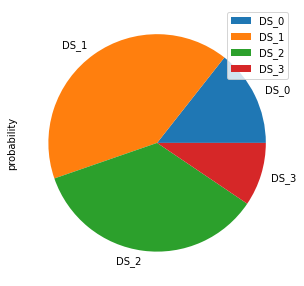

In [12]:
# Exercise 5 cont: 

# Create pie chart
plot = df_pie.plot.pie(subplots=True, figsize=(5, 5))

In [13]:
# Exercise 6: 
# TODO: Using joined GeoDataFrame, display a table of buidings with DS_3 >= 0.05 and sorted by DS_3

# Answer: 
# We have our joined object, GeoDataFrame bldgs_joined_gdf with all attributes (columns). We can create 
# a new one only with guid and damage states probability values:
# df_ds = bldgs_joined_gdf[['guid', 'DS_0', 'DS_1', 'DS_2', 'DS_3']]
# or re-use df_ds object from Exercise 5

df_ds3 = df_ds[df_ds['DS_3']>=0.05]
df_ds3.sort_values(by=['DS_3'])

,guid,DS_0,DS_1,DS_2,DS_3
6,11395729-3727-449d-9848-778d68edd7d8,0.076171,0.432794,0.420815,0.070220
11,d7603d04-6917-478c-8bb7-50cf9118f973,0.119953,0.434135,0.371550,0.074362
2,9f9b11f8-c25c-4760-b1d2-a63bbeec8e72,0.103226,0.415849,0.393358,0.087567
14,6dd342ef-498c-43a9-85cd-35ad76e4c279,0.143819,0.409244,0.352468,0.094468


In [14]:
# Exercise 7: 
# TODO: Using joined GeoDataFrame, plot a map of buidings with DS_3 >= 0.05 and sorted by DS_3

# Answer: 
# We have sorted object, df_ds3 from Exercise 6 however we removed the geometry. We need to go back and use 
# georeferenced object bldgs_joined_gdf with guid, geometry and DS_3.

bldgs_ds3 = bldgs_joined_gdf[['guid', 'geometry', 'DS_3']]
bldgs_ds3.head()

,guid,geometry,DS_3
0,ac8b0b44-ae82-4c48-afb8-076e2d16c7e5,POINT (-90.02585 35.14020),2.722964e-02
1,154b0a62-cae6-456d-8d90-635e3e1c2dcb,POINT (-90.02585 35.14020),2.860543e-02
2,9f9b11f8-c25c-4760-b1d2-a63bbeec8e72,POINT (-90.01928 35.13640),8.756720e-02
3,28321416-e473-473b-ad0a-c3c38248acc7,POINT (-90.07377 35.12344),2.738378e-02
4,b5069250-7a2b-47b1-9754-290528a6d72d,POINT (-90.04349 35.15360),1.000000e-10


In [15]:
# Exercise 7 cont: 

# We filter buildings by DS_3 value and sort them:
ds3 = bldgs_ds3[bldgs_ds3['DS_3']>=0.05]
ds3_sorted = ds3.sort_values(by=['DS_3'])
ds3_sorted.head()

,guid,geometry,DS_3
6,11395729-3727-449d-9848-778d68edd7d8,POINT (-90.04349 35.15360),0.070220
11,d7603d04-6917-478c-8bb7-50cf9118f973,POINT (-89.86438 35.09755),0.074362
2,9f9b11f8-c25c-4760-b1d2-a63bbeec8e72,POINT (-90.01928 35.13640),0.087567
14,6dd342ef-498c-43a9-85cd-35ad76e4c279,POINT (-89.77456 35.20624),0.094468


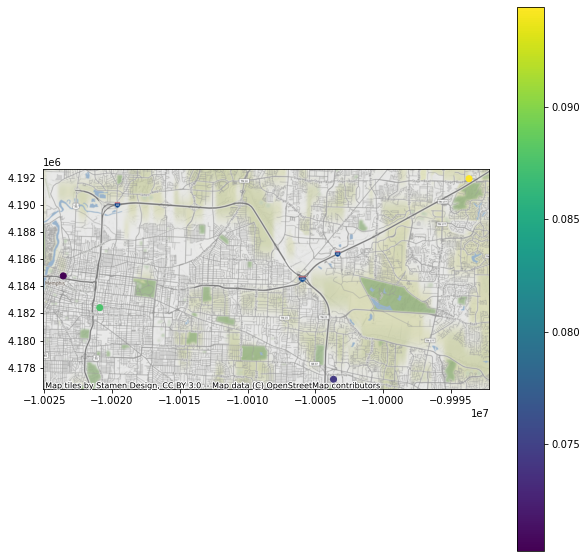

In [16]:
# Exercise 7 cont: 

# Plot a map of ds3_sorted GeoPandasDataset with pyincore_viz
geoviz.plot_gdf_map(ds3_sorted, 'DS_3', basemap=True)